<a href="https://colab.research.google.com/github/Favourj-bit/Random_projects/blob/main/Accident_severity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing xgboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.1 MB/s eta 0:00:00


In [ ]:
# importing the neccessary dependencies and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.utils import to_categorical
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# LOAD DATASET

In [ ]:
# reading and display the csv file

dataset = pd.read_csv("/content/drive/MyDrive/OPTION1_uk_road_accident_2019_coursework_final.csv")
dataset.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [ ]:
#dropping unneccessary columns in the data set
dataset = dataset.drop(["accident_index", ], axis=1)

# EXPLORATORY DATA ANALYSIS

In [ ]:
#shape of the dataset
dataset.shape

(31647, 13)

In [ ]:
#dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   speed_limit                  31647 non-null  int64  
 1   light_conditions             31647 non-null  object 
 2   weather_conditions           31647 non-null  object 
 3   road_surface_conditions      31647 non-null  object 
 4   vehicle_type                 31647 non-null  object 
 5   junction_location            31647 non-null  object 
 6   skidding_and_overturning     31647 non-null  object 
 7   vehicle_leaving_carriageway  31647 non-null  object 
 8   hit_object_off_carriageway   31647 non-null  object 
 9   first_point_of_impact        31647 non-null  object 
 10  sex_of_driver                31647 non-null  object 
 11  age_of_oldest_driver         25197 non-null  float64
 12  accident_severity            30475 non-null  object 
dtypes: float64(1), i

DATA VISUALISATIONS

In [ ]:
# list of object
categorical_columns = dataset.select_dtypes('object').columns.to_list()
categorical_columns

['light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'vehicle_type',
 'junction_location',
 'skidding_and_overturning',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'sex_of_driver',
 'accident_severity']

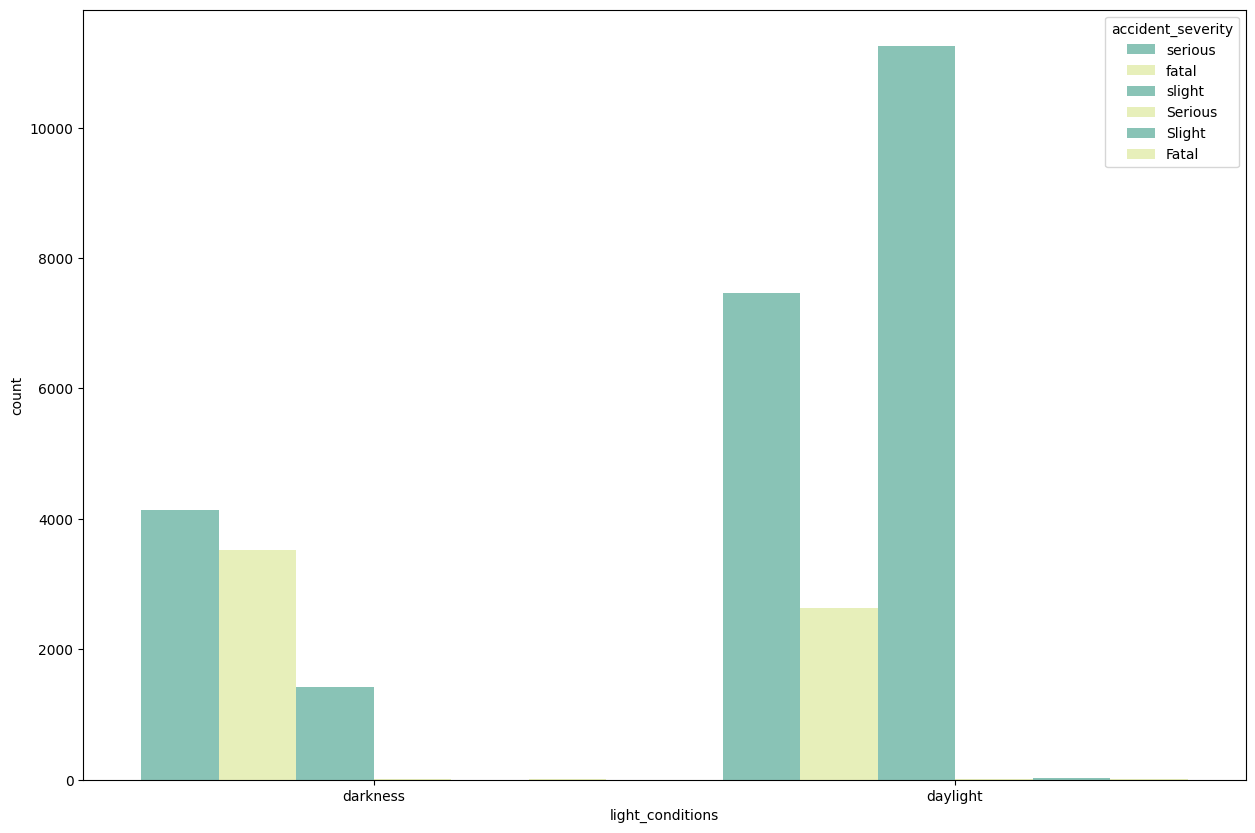

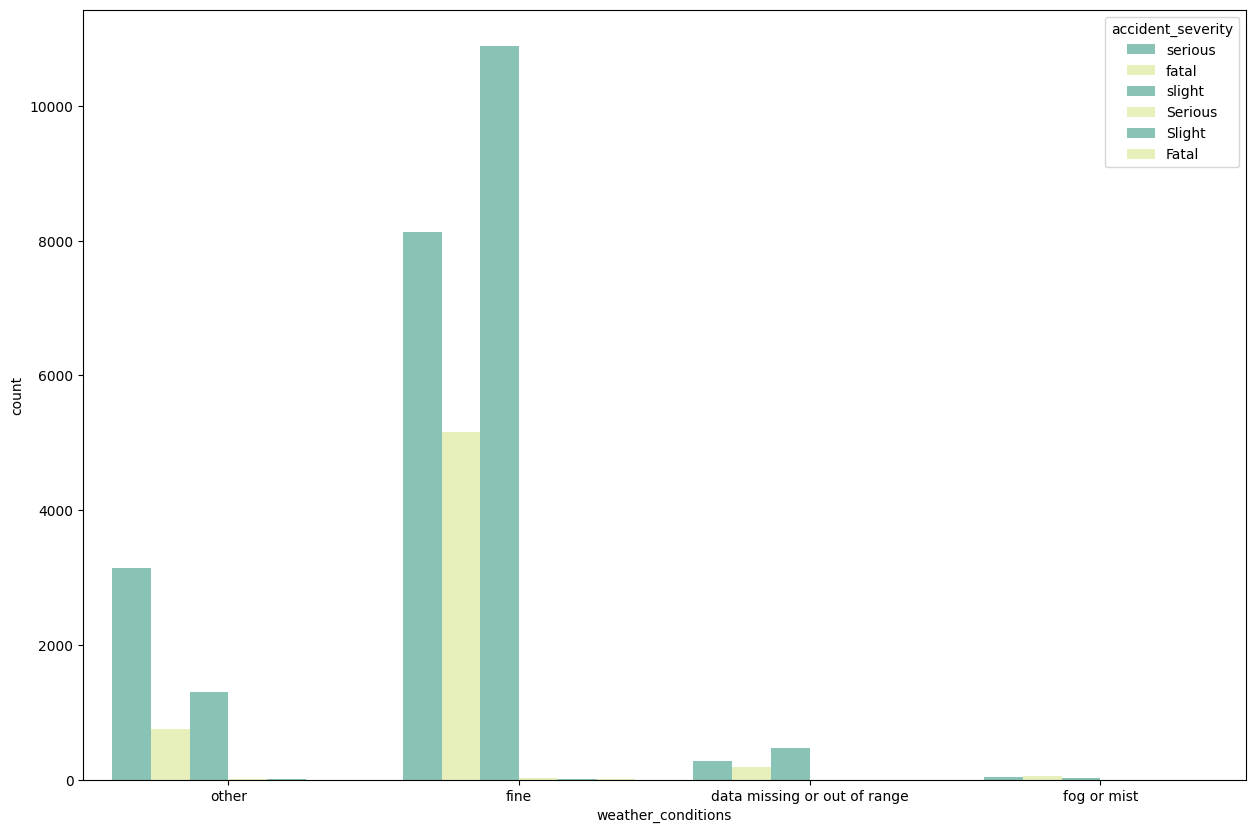

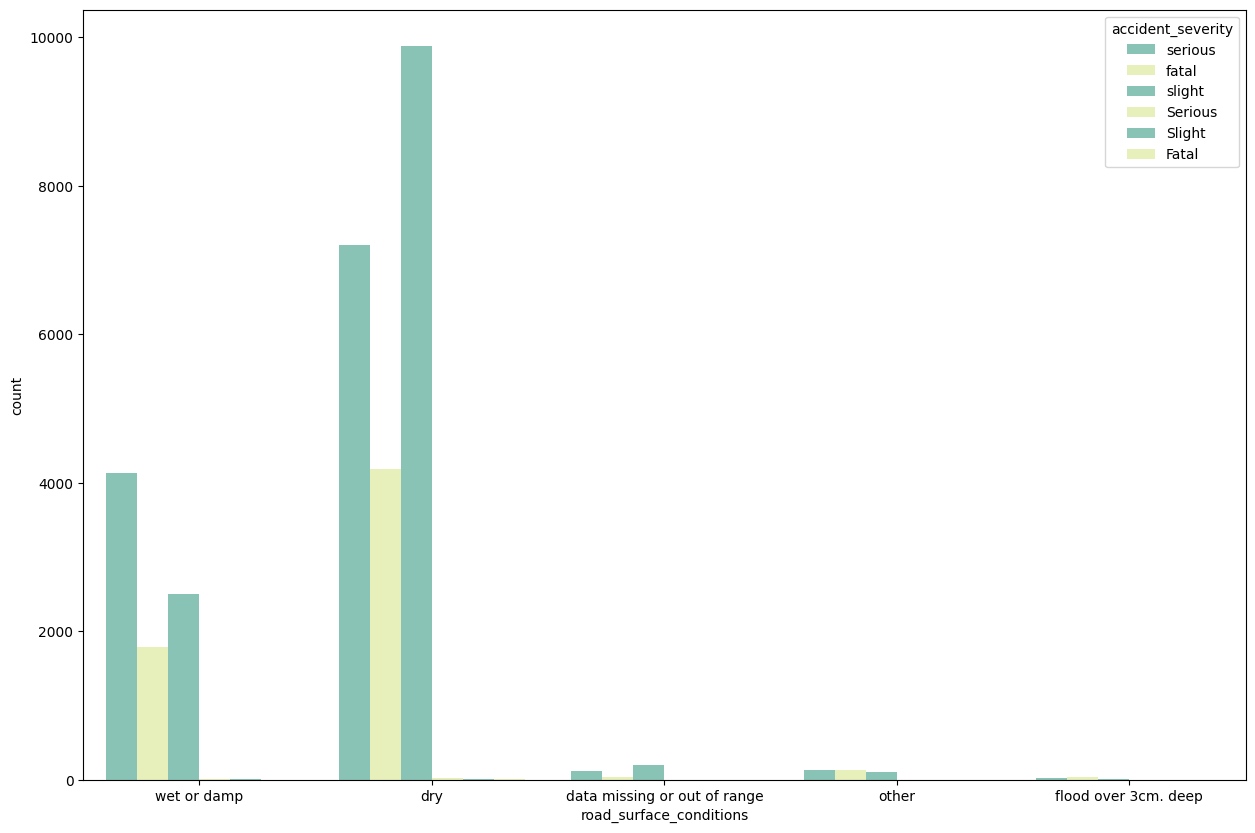

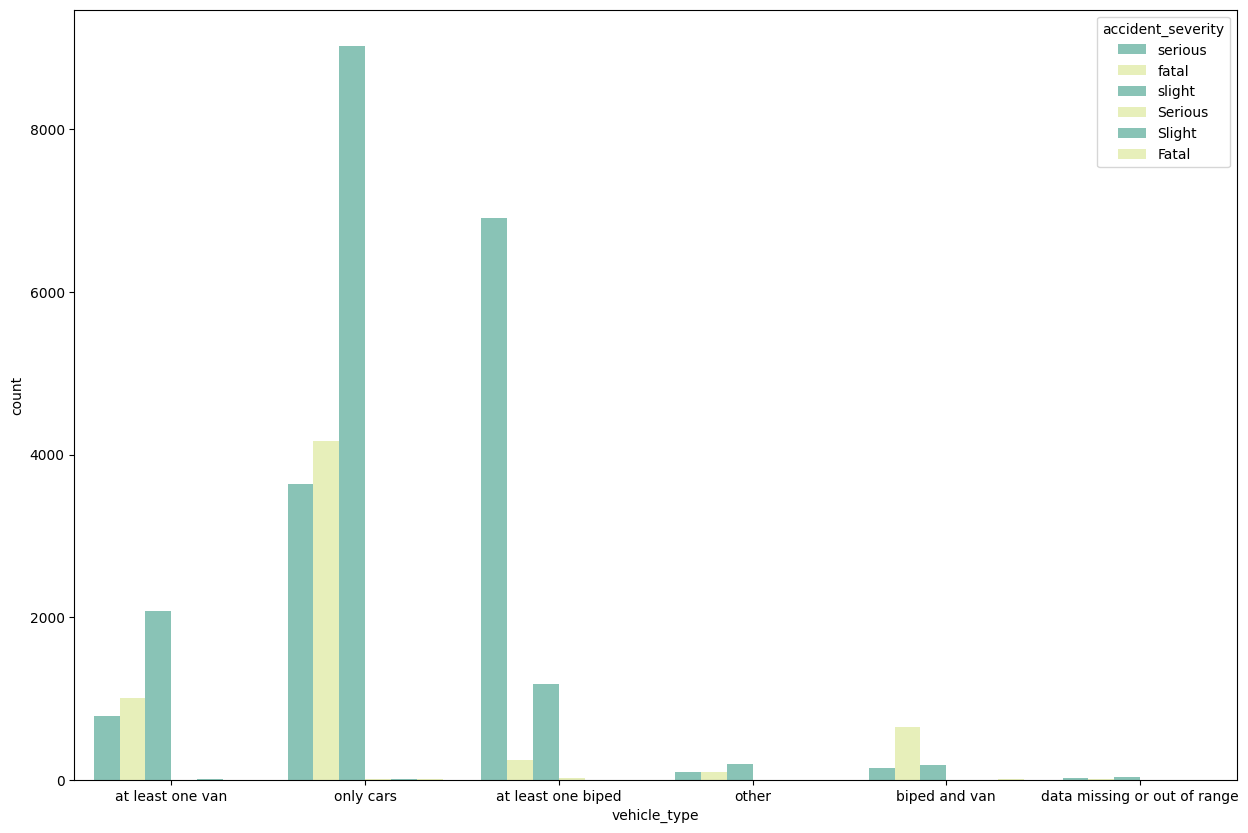

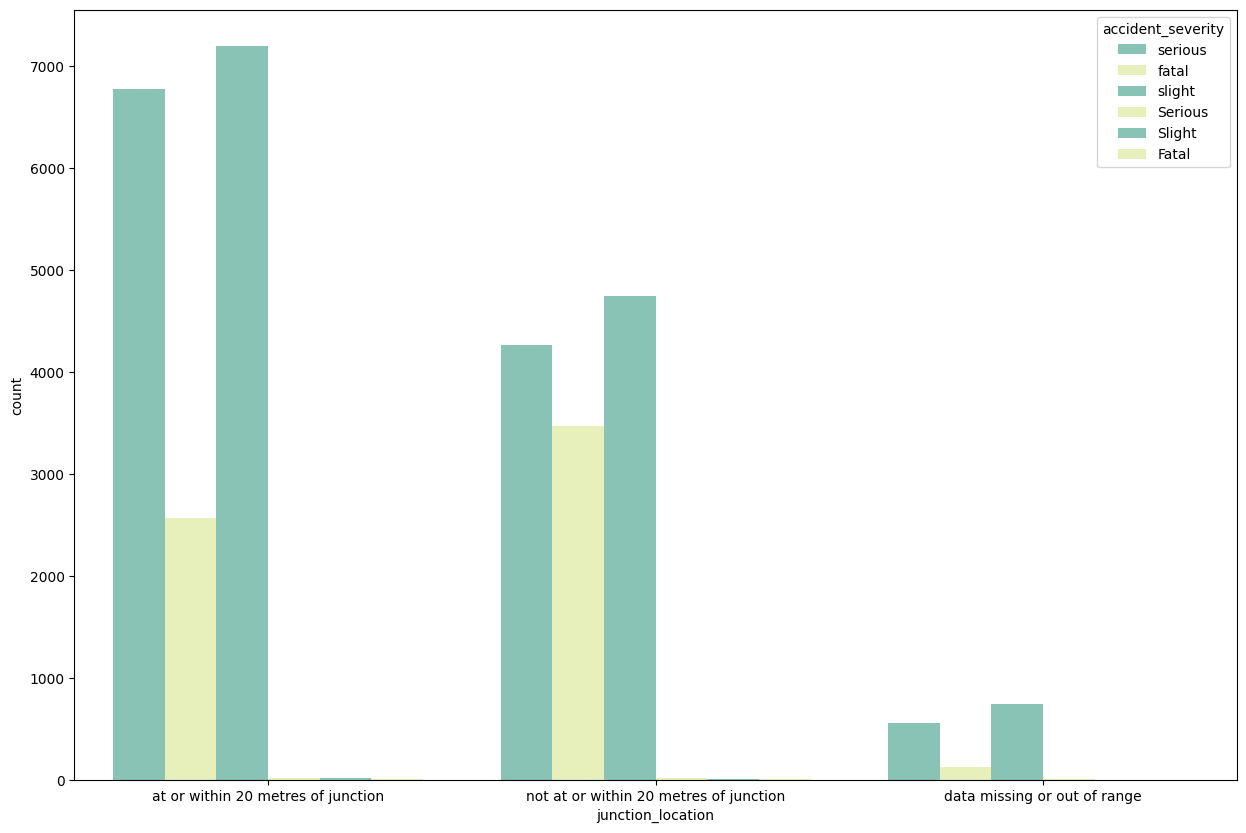

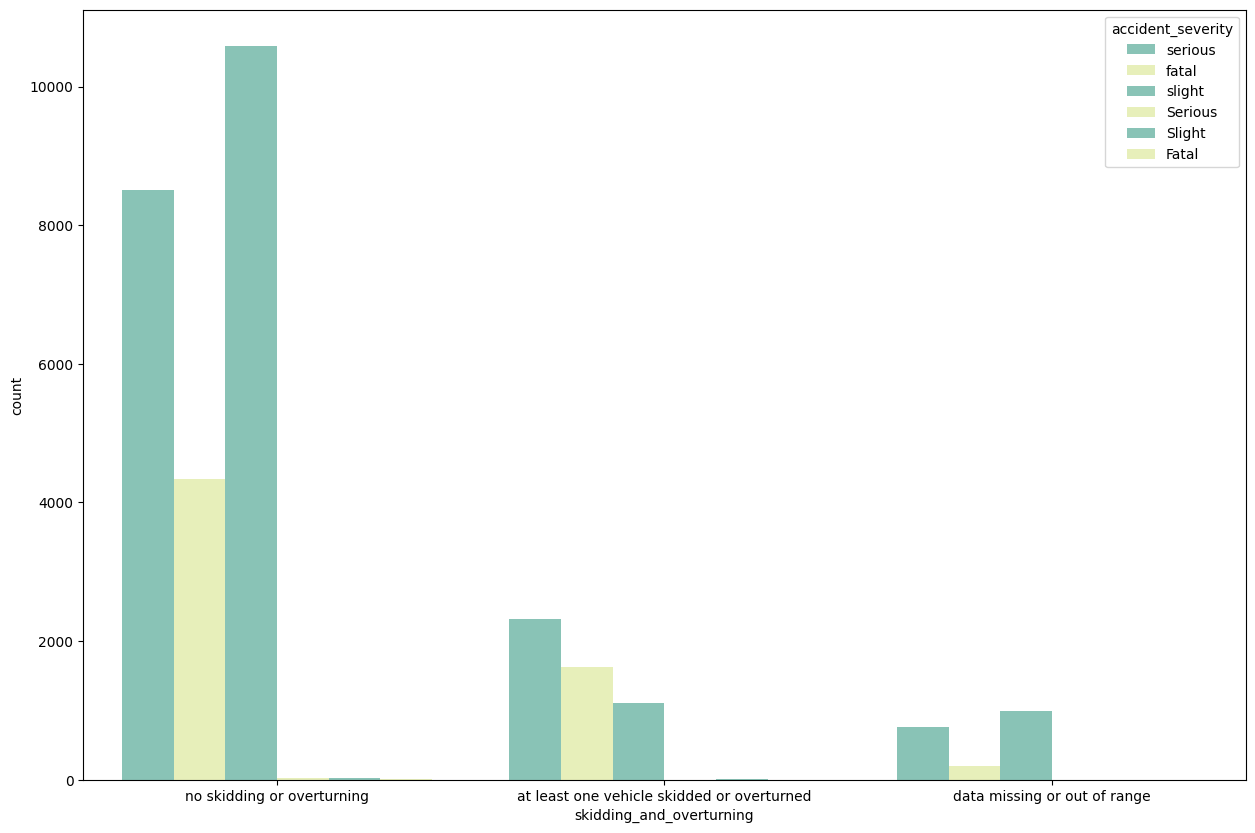

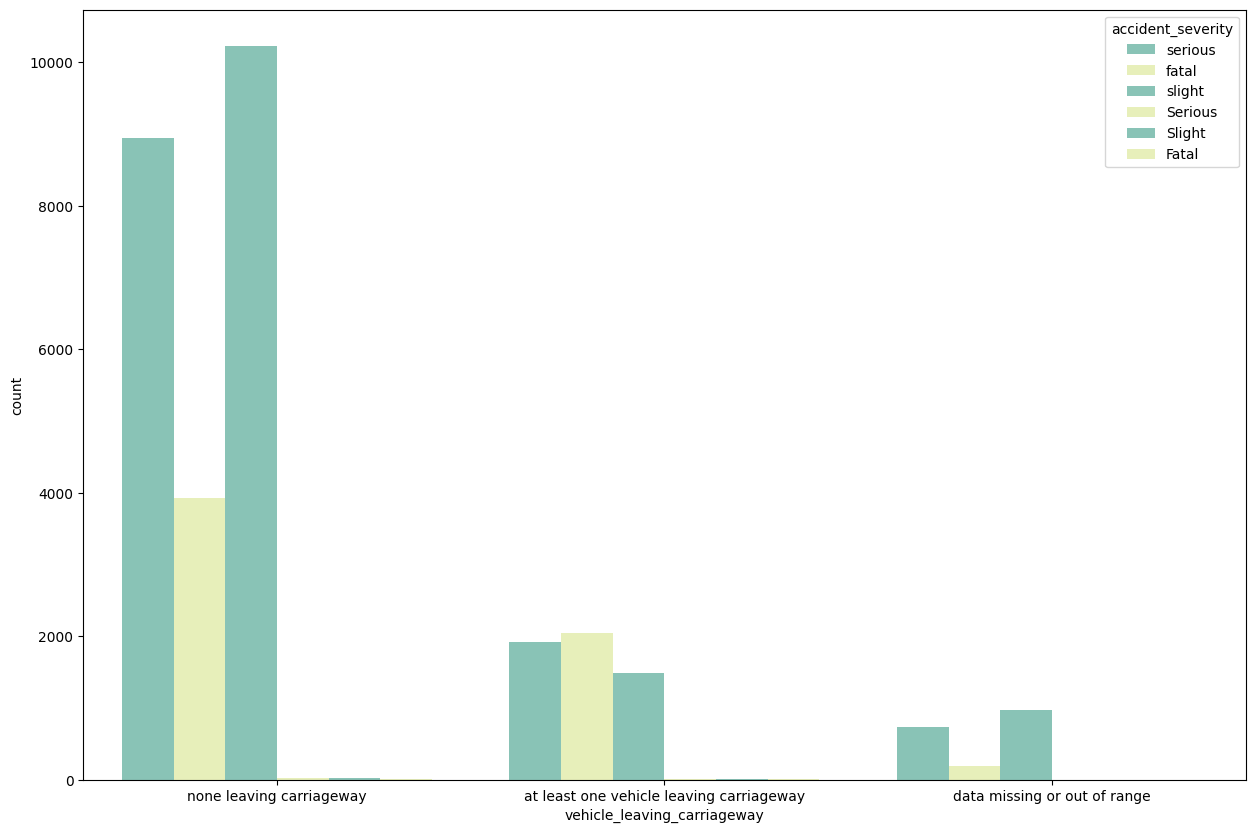

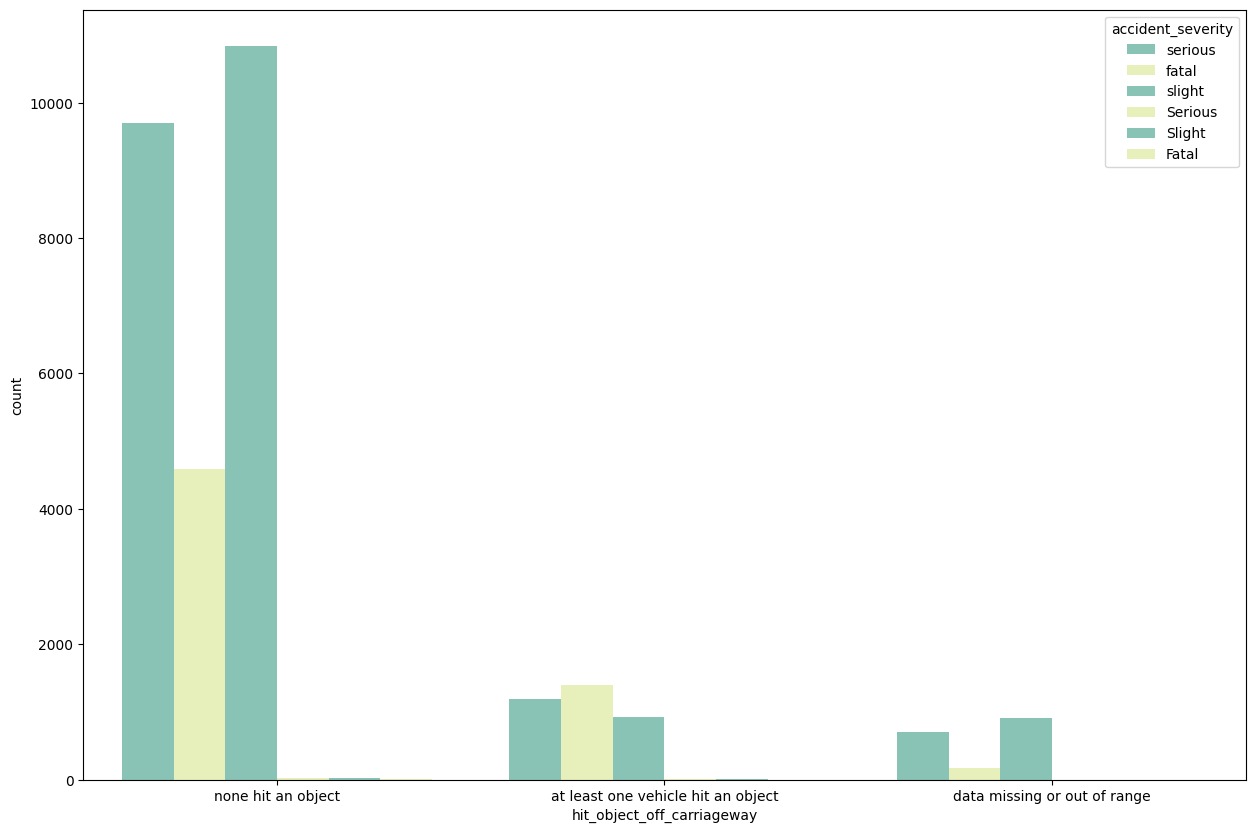

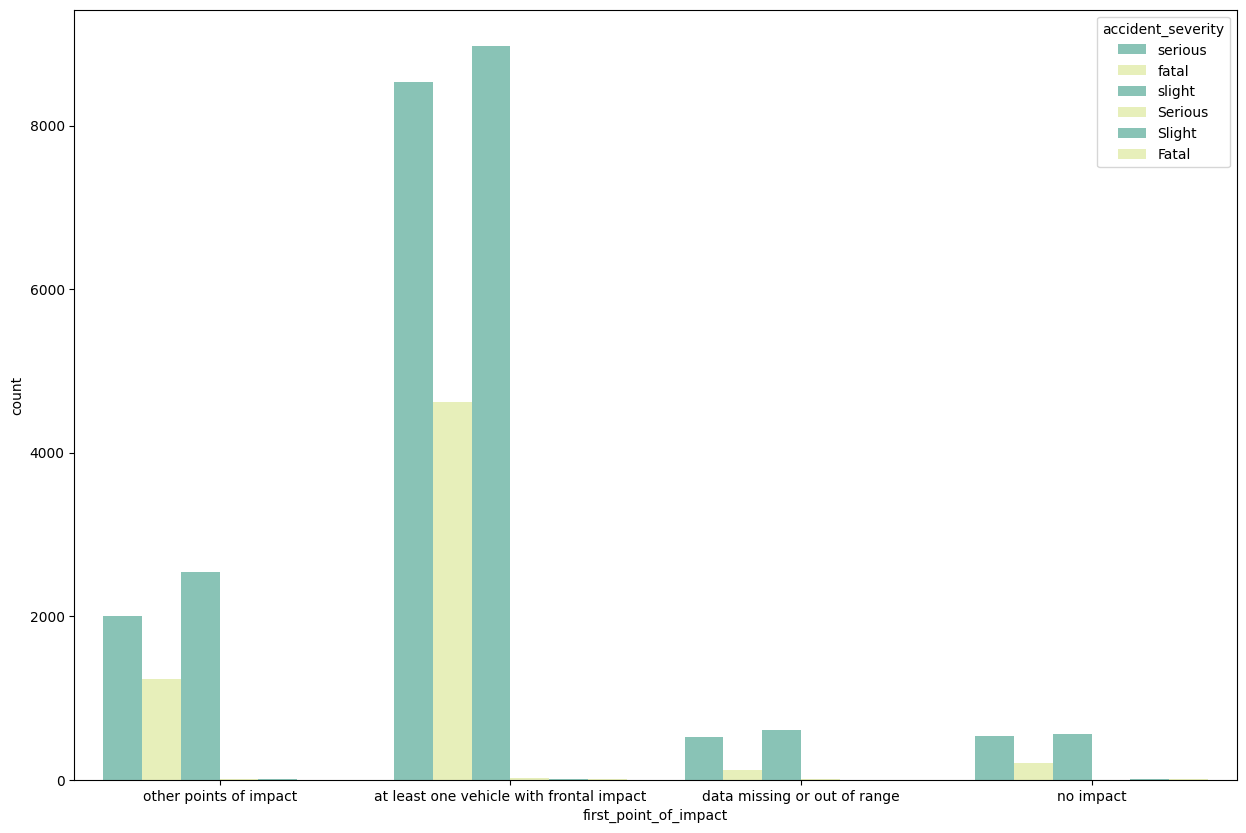

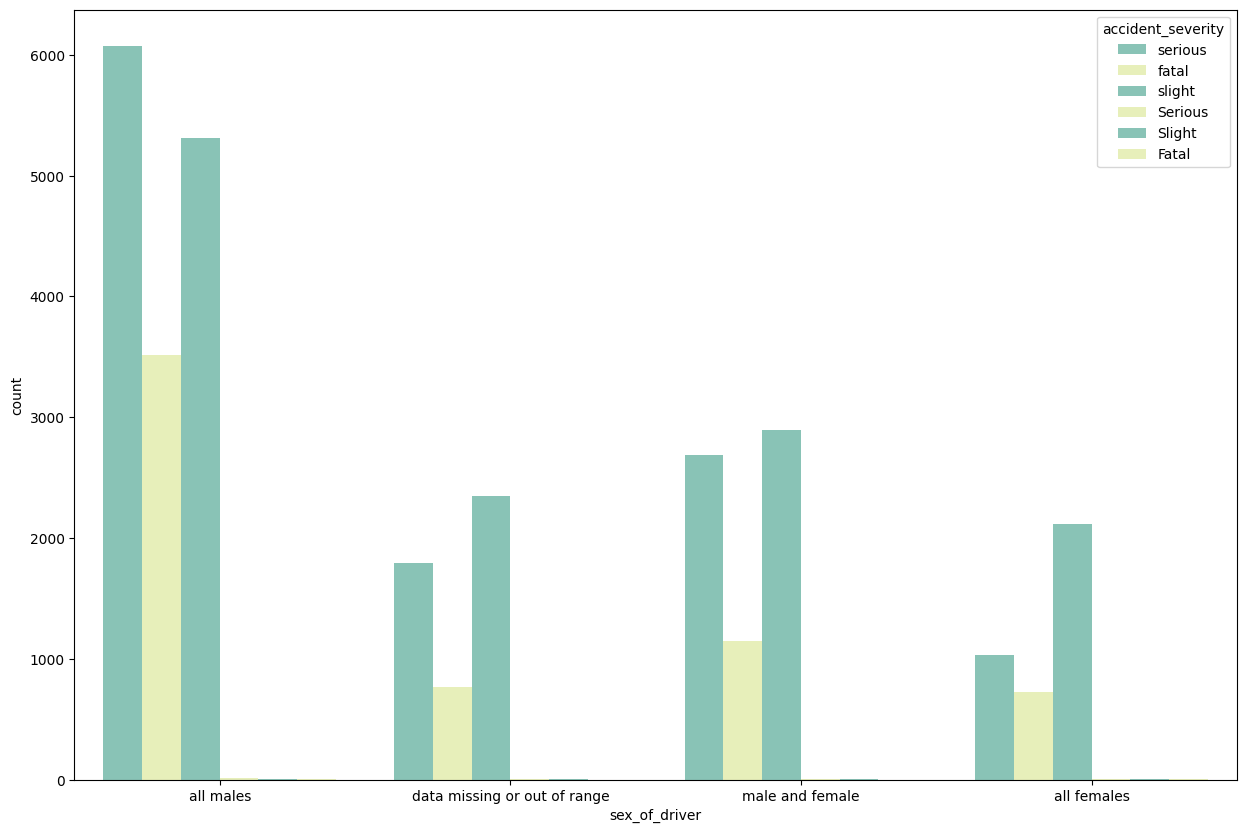

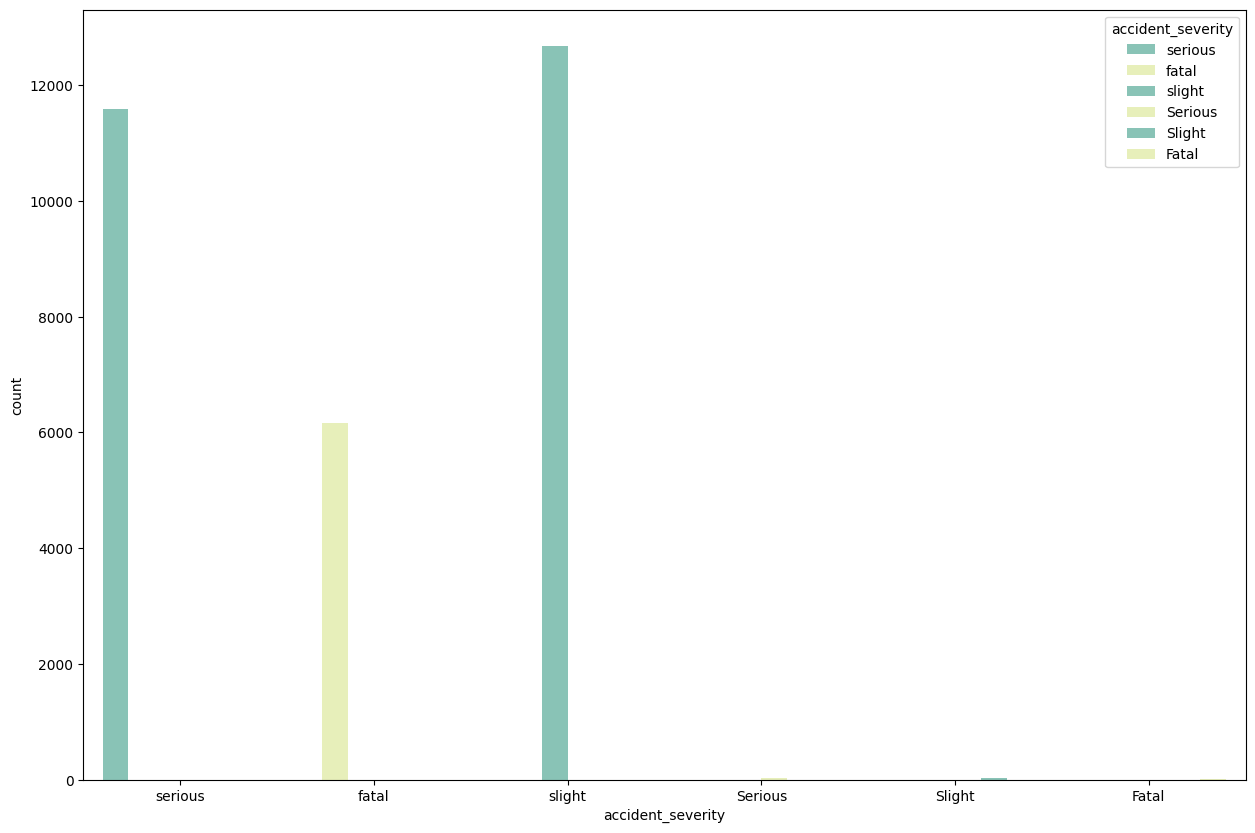

In [ ]:
# Plot of object columns in relation with the target column
for i in categorical_columns:
    plt.figure(figsize=(15,10))
    sns.countplot(x=i,hue='accident_severity',data=dataset,palette=["#7fcdbb","#edf8b1"])
    plt.xlabel(i,fontsize=10)

In [ ]:
def quantity_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending =True)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = True)
    quantity_df = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent', 'Nunique', 'Dtype'])
    display(quantity_df)

In [ ]:
quantity_report(dataset)

,Total,Percent,Nunique,Dtype
speed_limit,0,0.000000,7,int64
light_conditions,0,0.000000,2,object
weather_conditions,0,0.000000,4,object
road_surface_conditions,0,0.000000,5,object
vehicle_type,0,0.000000,6,object
junction_location,0,0.000000,3,object
skidding_and_overturning,0,0.000000,3,object
vehicle_leaving_carriageway,0,0.000000,3,object
hit_object_off_carriageway,0,0.000000,3,object
first_point_of_impact,0,0.000000,4,object


<Axes: xlabel='accident_severity', ylabel='count'>

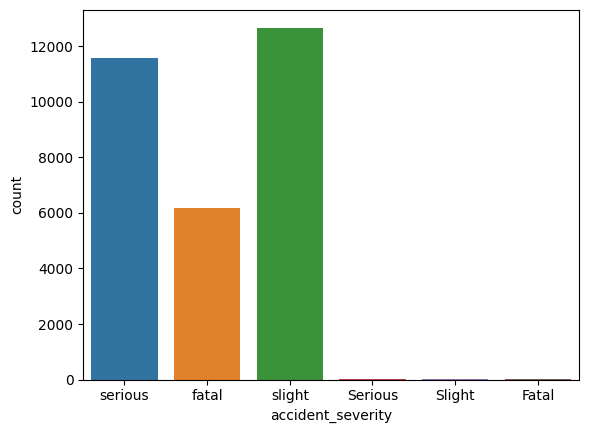

In [ ]:
#checking the target distribution
sns.countplot(dataset, x= 'accident_severity')

<Axes: xlabel='sex_of_driver', ylabel='count'>

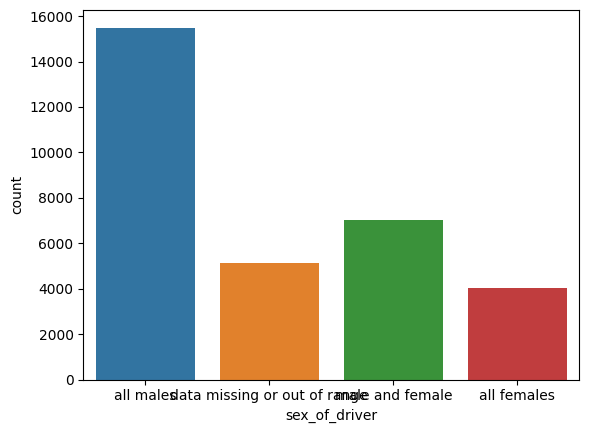

In [ ]:
sns.countplot(dataset, x= 'sex_of_driver')

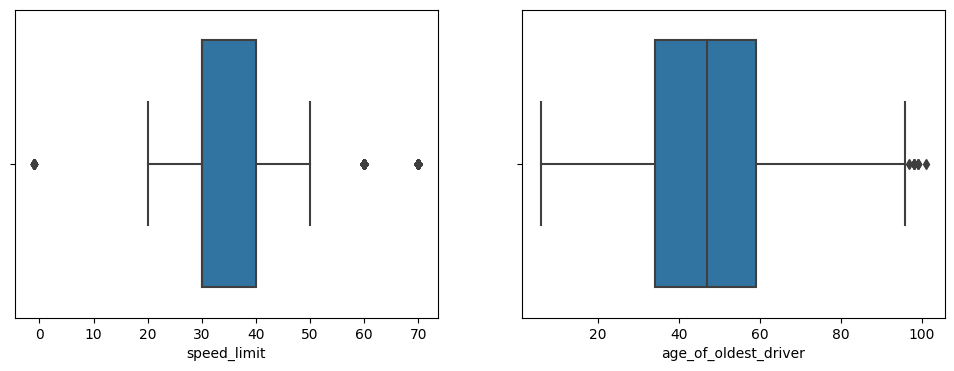

In [ ]:
#checking for outliers
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

for i, var in enumerate(['speed_limit', 'age_of_oldest_driver']):
    sns.boxplot(data=dataset, x=var, ax=axes[i])

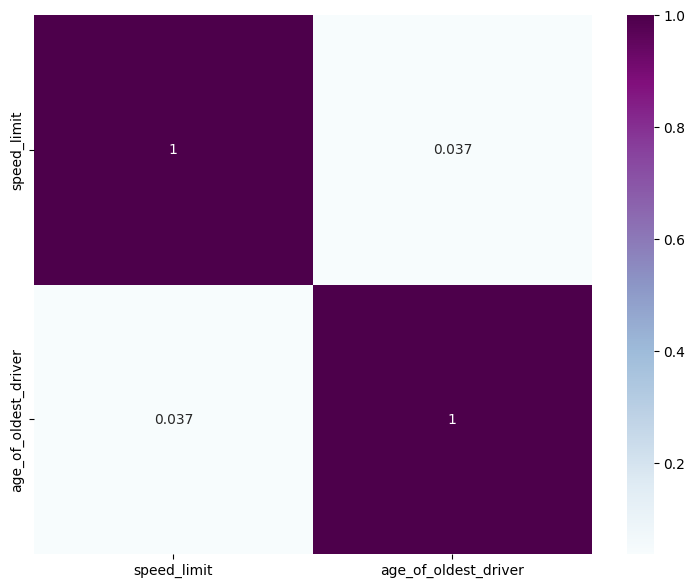

In [ ]:
#correlation plot
fig,ax = plt.subplots(figsize=(9,7))
correlations = dataset.corr()
sns.heatmap(correlations,cmap="BuPu",annot=True)
plt.show()

# DATA PREPROCESSING

HANDLING MISSING VALUES

In [ ]:
#checking for null values
total = dataset.isnull().sum().sort_values(ascending =True)

print(total)

speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
accident_severity              1172
age_of_oldest_driver           6450
dtype: int64


In [ ]:
dataset = dataset.dropna()

# Define a list of strings to remove
strings = ['data missing or out of range', 'NaN']

# Loop over all columns and drop rows containing the strings to remove
for col in dataset.columns:
    dataset = dataset[~dataset[col].isin(strings)]

dataset.head()

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
4,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
6,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
7,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight


In [ ]:
dataset.shape

(22847, 13)

In [ ]:
dataset.isnull().sum()

speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

In [ ]:
# duplicated value
dataset.duplicated().sum()

6186

In [ ]:
#drop dupllicate
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(16661, 13)

ENCODING CATEGORICAL FEATURE

In [ ]:
# convert all y values to same case I.e lowercase
dataset["accident_severity"] = dataset["accident_severity"].str.lower()

In [ ]:
# list of column
dataset.select_dtypes('object').columns.to_list()

['light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'vehicle_type',
 'junction_location',
 'skidding_and_overturning',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'sex_of_driver',
 'accident_severity']

In [ ]:
# converting categorical tables into one hot encoding value
dataset = pd.get_dummies(dataset, columns = ['light_conditions', 'weather_conditions', 'road_surface_conditions','vehicle_type', 'junction_location', 'skidding_and_overturning','vehicle_leaving_carriageway', 'hit_object_off_carriageway','first_point_of_impact', 'sex_of_driver'])
dataset

,speed_limit,age_of_oldest_driver,accident_severity,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,...,vehicle_leaving_carriageway_at least one vehicle leaving carriageway,vehicle_leaving_carriageway_none leaving carriageway,hit_object_off_carriageway_at least one vehicle hit an object,hit_object_off_carriageway_none hit an object,first_point_of_impact_at least one vehicle with frontal impact,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female
0,30,63.0,serious,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
1,30,82.0,fatal,1,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,30,39.0,slight,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,1,0,0
6,30,40.0,fatal,1,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
7,50,57.0,slight,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,60,54.0,fatal,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
31642,30,27.0,serious,1,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
31643,60,27.0,serious,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
31644,70,67.0,slight,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0


In [ ]:
dataset.sum()

speed_limit                                                                                                        668746
age_of_oldest_driver                                                                                             793793.0
accident_severity                                                       seriousfatalslightfatalslightfatalfatalslightf...
light_conditions_darkness                                                                                            5537
light_conditions_daylight                                                                                           11124
weather_conditions_fine                                                                                             13094
weather_conditions_fog or mist                                                                                         98
weather_conditions_other                                                                                             3469
road_surface_conditions_

In [ ]:
dataset.head()

,speed_limit,age_of_oldest_driver,accident_severity,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,...,vehicle_leaving_carriageway_at least one vehicle leaving carriageway,vehicle_leaving_carriageway_none leaving carriageway,hit_object_off_carriageway_at least one vehicle hit an object,hit_object_off_carriageway_none hit an object,first_point_of_impact_at least one vehicle with frontal impact,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female
0,30,63.0,serious,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
1,30,82.0,fatal,1,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,30,39.0,slight,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,1,0,0
6,30,40.0,fatal,1,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
7,50,57.0,slight,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0


In [ ]:
cat_features = ["accident_severity"]
for cat_feature in cat_features:
    dataset[f"{cat_feature}_cat"] = dataset[cat_feature].astype('category')
    dataset[f"{cat_feature}_cat"] = dataset[f"{cat_feature}_cat"].cat.codes

dataset.head()

,speed_limit,age_of_oldest_driver,accident_severity,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,...,vehicle_leaving_carriageway_none leaving carriageway,hit_object_off_carriageway_at least one vehicle hit an object,hit_object_off_carriageway_none hit an object,first_point_of_impact_at least one vehicle with frontal impact,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,accident_severity_cat
0,30,63.0,serious,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,30,82.0,fatal,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,30,39.0,slight,0,1,1,0,0,1,0,...,1,0,1,1,0,0,1,0,0,2
6,30,40.0,fatal,1,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
7,50,57.0,slight,0,1,1,0,0,1,0,...,1,0,1,1,0,0,0,1,0,2


In [ ]:
#dropping string columns after replacing with another column
dataset.drop(['accident_severity'],axis=1,inplace=True)

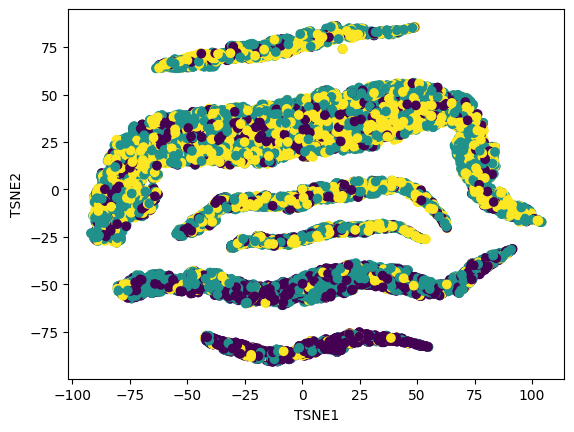

In [ ]:
# Split the dataset into features and target labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Apply t-SNE to reduce the dimensionality of the features
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Plot the reduced dataset with the target labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

# MACHINE LEARNING MODEL

In [ ]:
# Split data into X (features) and y (target)
X = dataset.drop('accident_severity_cat', axis=1)
y = dataset['accident_severity_cat']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102,stratify=y)

In [ ]:
# scaling the features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

BASELINE MODEL

In [ ]:
# Generate example data
train_x = np.random.randn(100, 10)  # Training data
train_y = np.random.randint(0, 3, size=100)  # Training labels
test_x = np.random.randn(50, 10)  # Test data
test_y = np.random.randint(0, 3, size=50)  # Test labels

# Determine the most frequent class label in the training data
majority_class = Counter(train_y).most_common(1)[0][0]

In [ ]:
# Make predictions on the test data using the majority class label
pred_y = np.full_like(test_y, fill_value=majority_class)

In [ ]:
# Evaluate the accuracy and F1 score
acc = accuracy_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y, average='weighted')

print(f"Majority class baseline accuracy: {acc:.3f}")
print(f"Majority class baseline F1 score: {f1:.3f}")

Majority class baseline accuracy: 0.320
Majority class baseline F1 score: 0.155


1. CATBOOST

In [ ]:
# Initialize CatBoostClassifier
model = CatBoostClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

Learning rate set to 0.0903
0:	learn: 1.0363620	total: 60.4ms	remaining: 1m
1:	learn: 0.9870681	total: 85.4ms	remaining: 42.6s
2:	learn: 0.9452380	total: 101ms	remaining: 33.5s
3:	learn: 0.9140160	total: 117ms	remaining: 29.2s
4:	learn: 0.8846957	total: 134ms	remaining: 26.6s
5:	learn: 0.8634519	total: 157ms	remaining: 26s
6:	learn: 0.8444088	total: 171ms	remaining: 24.2s
7:	learn: 0.8270632	total: 190ms	remaining: 23.5s
8:	learn: 0.8104376	total: 209ms	remaining: 23s
9:	learn: 0.7965837	total: 225ms	remaining: 22.3s
10:	learn: 0.7866642	total: 249ms	remaining: 22.4s
11:	learn: 0.7761974	total: 265ms	remaining: 21.8s
12:	learn: 0.7667416	total: 281ms	remaining: 21.4s
13:	learn: 0.7592280	total: 298ms	remaining: 21s
14:	learn: 0.7525490	total: 317ms	remaining: 20.8s
15:	learn: 0.7462809	total: 335ms	remaining: 20.6s
16:	learn: 0.7409249	total: 346ms	remaining: 20s
17:	learn: 0.7364042	total: 358ms	remaining: 19.5s
18:	learn: 0.7326259	total: 368ms	remaining: 19s
19:	learn: 0.7291836	tot

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Measuring accuracy
print(classification_report(y_test, y_pred))

# compute confusion matrix
con = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", con)

# compute F1 score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 score:", f1)

Accuracy: 0.7065706570657065
              precision    recall  f1-score   support

           0       0.62      0.83      0.71       852
           1       0.75      0.66      0.70      1338
           2       0.76      0.67      0.71      1143

    accuracy                           0.71      3333
   macro avg       0.71      0.72      0.71      3333
weighted avg       0.72      0.71      0.71      3333

Confusion matrix:
 [[709  96  47]
 [266 877 195]
 [173 201 769]]
F1 score: 0.7064055558404341


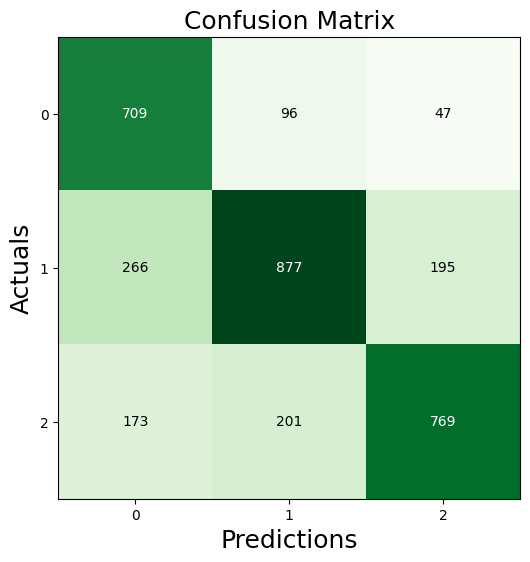

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

2. XGBOOST

In [ ]:
# create an XGBoost model object
model_1 = xgb.XGBClassifier()

# fit the model to the training data
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# make predictions on the testing data
y_pred1 = model_1.predict(X_test)

In [ ]:
# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Measuring accuracy
print(classification_report(y_test, y_pred1))

# compute confusion matrix
con1 = confusion_matrix(y_test, y_pred1)
print("Confusion matrix:\n", con1)

# compute F1 score
f1 = f1_score(y_test, y_pred1,average='weighted')
print("F1 score:", f1)

Accuracy: 0.7065706570657065
              precision    recall  f1-score   support

           0       0.62      0.85      0.71       852
           1       0.75      0.65      0.70      1338
           2       0.76      0.66      0.71      1143

    accuracy                           0.71      3333
   macro avg       0.71      0.72      0.71      3333
weighted avg       0.72      0.71      0.71      3333

Confusion matrix:
 [[720  93  39]
 [266 875 197]
 [178 205 760]]
F1 score: 0.7060601427359282


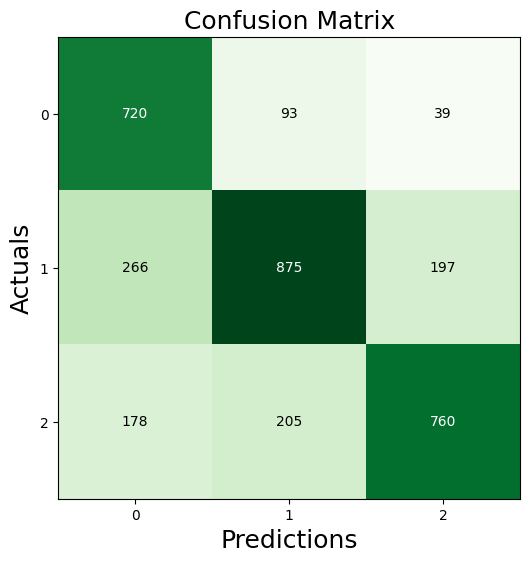

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

3. LOGISTIC REGRESSION

In [ ]:
# create a logistic regression model object
model_2 = LogisticRegression()

# fit the model on the training data
model_2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# make predictions on the testing data
y_pred2 = model_2.predict(X_test)

In [ ]:
# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Measuring accuracy
print(classification_report(y_test, y_pred2))

# compute confusion matrix
con2 = confusion_matrix(y_test, y_pred2)
print("Confusion matrix:\n", con2)

# compute F1 score
f1 = f1_score(y_test, y_pred2,average='weighted')
print("F1 score:", f1)

Accuracy: 68.92%
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       852
           1       0.73      0.64      0.68      1338
           2       0.70      0.70      0.70      1143

    accuracy                           0.69      3333
   macro avg       0.69      0.70      0.69      3333
weighted avg       0.69      0.69      0.69      3333

Confusion matrix:
 [[640 123  89]
 [231 858 249]
 [153 191 799]]
F1 score: 0.6892195668487808


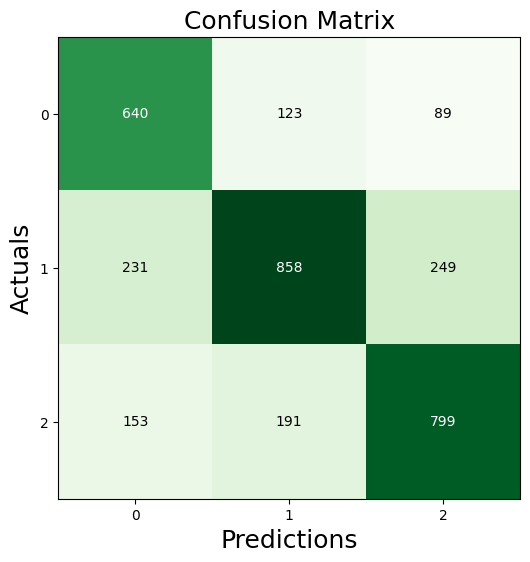

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

4. SVC

In [ ]:
# Instantiate the SVC model with default hyperparameters
svc_model = SVC()

# Fit the model on training data
svc_model.fit(X_train, y_train)
print("Final hyperparameters used:", svc_model.get_params())

Final hyperparameters used: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Predict the target variable on test data
y_pred3 = svc_model.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")

# Measuring accuracy
print(classification_report(y_test, y_pred3))

# compute confusion matrix
con3 = confusion_matrix(y_test, y_pred3)
print("Confusion matrix:\n", con3)

# compute F1 score
f1 = f1_score(y_test, y_pred3,average='weighted')
print("F1 score:", f1)

Accuracy: 0.708070807080708
              precision    recall  f1-score   support

           0       0.61      0.86      0.71       852
           1       0.76      0.65      0.70      1338
           2       0.78      0.67      0.72      1143

    accuracy                           0.71      3333
   macro avg       0.71      0.72      0.71      3333
weighted avg       0.73      0.71      0.71      3333

Confusion matrix:
 [[732  89  31]
 [283 867 188]
 [193 189 761]]
F1 score: 0.7078661425974808


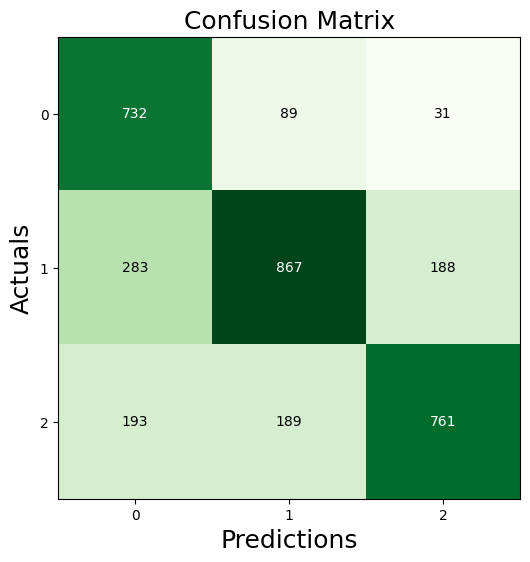

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con3, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

HYPERPARAMETER WITH SVC

In [ ]:
# define the SVM model
svm = SVC()

# define the hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)

# fit the model with grid search
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

In [ ]:
# Predict the target variable on test data
y_pred4 = grid_search.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy}")

# Measuring accuracy
print(classification_report(y_test, y_pred4))

# compute confusion matrix
con4 = confusion_matrix(y_test, y_pred4)
print("Confusion matrix:\n", con4)

# compute F1 score
f1 = f1_score(y_test, y_pred4,average='weighted')
print("F1 score:", f1)

Accuracy: 0.708070807080708
              precision    recall  f1-score   support

           0       0.61      0.86      0.71       852
           1       0.76      0.65      0.70      1338
           2       0.78      0.67      0.72      1143

    accuracy                           0.71      3333
   macro avg       0.71      0.72      0.71      3333
weighted avg       0.73      0.71      0.71      3333

Confusion matrix:
 [[732  89  31]
 [283 867 188]
 [193 189 761]]
F1 score: 0.7078661425974808


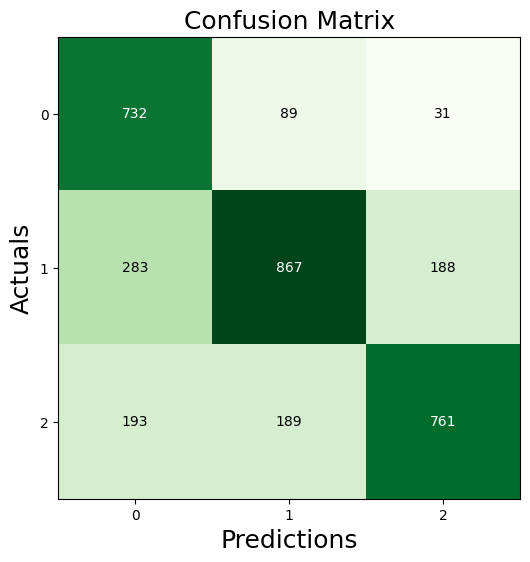

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con4, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# NEURAL NETWORK MODEL

BASELINE MODEL

In [ ]:
# Generate some example data with 3 classes
X = np.random.randn(100, 10)  # 100 samples with 10 features each
y = np.random.randint(0, 3, size=100)  # 3 classes (0, 1, 2)

# Compute the class distribution in the training data
class_counts = np.bincount(y)
class_probs = class_counts / len(y)

# Define a function to make random predictions based on the class distribution
def random_baseline(x):
    return np.random.choice(range(len(class_probs)), p=class_probs)

# Make random predictions on the test data
test = np.random.randn(50, 10)  # 50 samples with 10 features each
pred = np.array([random_baseline(x) for x in test])

# Compute the accuracy of the random predictions
accuracy = np.mean(pred == np.zeros(len(pred)))
print("Random baseline accuracy:", accuracy)

Random baseline accuracy: 0.38


1. CONVOLUTIONAL NEURAL NETWORK

In [ ]:
# Define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[0], activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
417/417 [==============================] - 5s 8ms/step - loss: 0.9231 - accuracy: 0.6180
Epoch 2/10
417/417 [==============================] - 3s 8ms/step - loss: 0.7765 - accuracy: 0.6798
Epoch 3/10
417/417 [==============================] - 3s 7ms/step - loss: 0.7562 - accuracy: 0.6867
Epoch 4/10
417/417 [==============================] - 4s 10ms/step - loss: 0.7413 - accuracy: 0.6984
Epoch 5/10
417/417 [==============================] - 3s 8ms/step - loss: 0.7385 - accuracy: 0.6975
Epoch 6/10
417/417 [==============================] - 3s 7ms/step - loss: 0.7305 - accuracy: 0.7033
Epoch 7/10
417/417 [==============================] - 3s 8ms/step - loss: 0.7259 - accuracy: 0.7051
Epoch 8/10
417/417 [==============================] - 4s 10ms/step - loss: 0.7216 - accuracy: 0.7110
Epoch 9/10
417/417 [==============================] - 3s 8ms/step - loss: 0.7211 - accuracy: 0.7086
Epoch 10/10
417/417 [==============================] - 3s 8ms/step - loss: 0.7151 - accuracy: 0.71

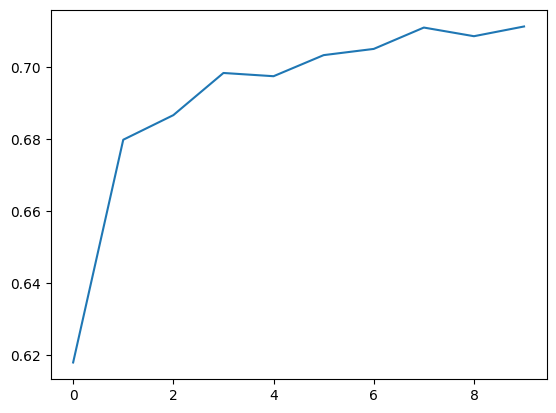

In [ ]:
plt.plot(history.history['accuracy'])

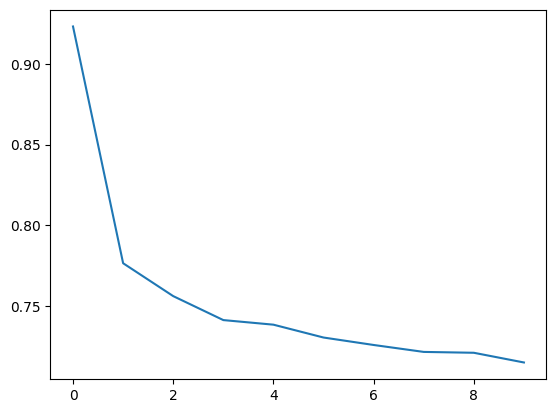

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
# prediction
y_pred4 = model.predict(X_test)
y_pred_labels = np.argmax(y_pred4, axis=1)

105/105 [==============================] - 0s 3ms/step


In [ ]:
# Evaluate the accuracy of the CNN on the testing data
accuracy = accuracy_score(y_test, y_pred_labels)
print('Accuracy:', accuracy)

# Measuring accuracy
print(classification_report(y_test, y_pred_labels))

# compute confusion matrix
con4 = confusion_matrix(y_test, y_pred_labels)
print("Confusion matrix:\n", con4)

# compute F1 score
f1 = f1_score(y_test, y_pred_labels,average='weighted')
print("F1 score:", f1)

Accuracy: 0.7146714671467147
              precision    recall  f1-score   support

           0       0.61      0.89      0.73       852
           1       0.77      0.64      0.70      1338
           2       0.78      0.67      0.72      1143

    accuracy                           0.71      3333
   macro avg       0.72      0.73      0.72      3333
weighted avg       0.73      0.71      0.71      3333

Confusion matrix:
 [[757  70  25]
 [286 860 192]
 [190 188 765]]
F1 score: 0.7136712673915436


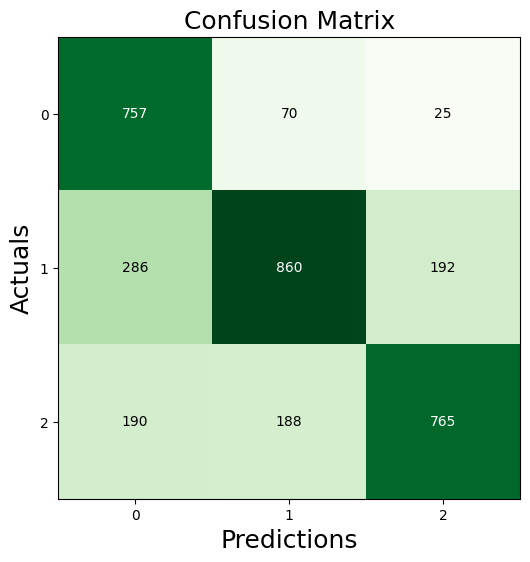

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con4, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

HYPERPARAMETER TUNING WITH CNN

In [ ]:
# Define the CNN model as a function
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(filters=64, kernel_size=3, dropout=0.5, pool_size=2, dense_units=100):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(y.shape[0], activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier from the model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to search
param_grid = {'filters': [32, 64, 128], 'kernel_size': [3, 5], 'dropout': [0.3, 0.5, 0.7], 'pool_size': [2, 3], 'dense_units': [50, 100, 200]}

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the model with grid search
history = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy score: ", accuracy)

<ipython-input-69-d95bf2d59577>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best hyperparameters:  {'dense_units': 100, 'dropout': 0.3, 'filters': 128, 'kernel_size': 5, 'pool_size': 3}
Best accuracy score:  0.697479764620463
105/105 [==============================] - 1s 5ms/step
Test accuracy score:  0.6705670567056705


In [ ]:
# Evaluate the accuracy of the  on the testing data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Measuring accuracy
print(classification_report(y_test, y_pred))

# compute confusion matrix
con = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", con)

# compute F1 score
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 score:", f1)

Accuracy: 0.6705670567056705
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       852
           1       0.70      0.63      0.66      1338
           2       0.67      0.72      0.69      1143

    accuracy                           0.67      3333
   macro avg       0.67      0.67      0.67      3333
weighted avg       0.67      0.67      0.67      3333

Confusion matrix:
 [[570 177 105]
 [198 846 294]
 [133 191 819]]
F1 score: 0.6703142447720114


2. Multilayer Perceptron

In [ ]:
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [ ]:
# Use the trained MLPClassifier to predict the labels of the testing data
y_pred5 = mlp.predict(X_test)

In [ ]:
# Evaluate the accuracy of the MLPClassifier on the testing data
accuracy = accuracy_score(y_test, y_pred5)
print('Accuracy:', accuracy)

# Measuring accuracy
print(classification_report(y_test, y_pred5))

# compute confusion matrix
con5 = confusion_matrix(y_test, y_pred5)
print("Confusion matrix:\n", con5)

# compute F1 score
f1 = f1_score(y_test, y_pred5,average='weighted')
print("F1 score:", f1)

Accuracy: 0.6798679867986799
              precision    recall  f1-score   support

           0       0.60      0.75      0.67       852
           1       0.71      0.65      0.68      1338
           2       0.73      0.66      0.69      1143

    accuracy                           0.68      3333
   macro avg       0.68      0.69      0.68      3333
weighted avg       0.69      0.68      0.68      3333

Confusion matrix:
 [[643 132  77]
 [258 873 207]
 [165 228 750]]
F1 score: 0.6803068343287921


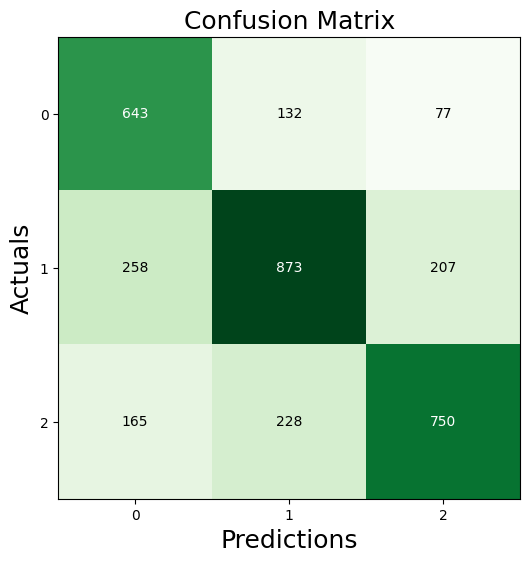

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con5, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

3. KERAS

In [ ]:
from tensorflow import keras
NN_model = keras.Sequential([
    keras.layers.Dense(48, input_dim=X_train.shape[1], activation="relu" ),
    keras.layers.Dense(24,  activation="relu" ),
    keras.layers.Dense(12,  activation="relu" ),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(6,  activation="relu" ),
    keras.layers.Dense(3,  activation="softmax" )
])
NN_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
epochs = 100
history = NN_model.fit( X_train, y_train, epochs=epochs, validation_split = 0.2)

Epoch 1/100
334/334 [==============================] - 2s 3ms/step - loss: 0.9220 - accuracy: 0.5672 - val_loss: 0.7360 - val_accuracy: 0.7134
Epoch 2/100
334/334 [==============================] - 1s 3ms/step - loss: 0.7879 - accuracy: 0.6730 - val_loss: 0.7151 - val_accuracy: 0.7224
Epoch 3/100
334/334 [==============================] - 1s 3ms/step - loss: 0.7554 - accuracy: 0.6918 - val_loss: 0.6995 - val_accuracy: 0.7318
Epoch 4/100
334/334 [==============================] - 1s 2ms/step - loss: 0.7451 - accuracy: 0.6968 - val_loss: 0.6976 - val_accuracy: 0.7307
Epoch 5/100
334/334 [==============================] - 1s 3ms/step - loss: 0.7333 - accuracy: 0.7011 - val_loss: 0.6918 - val_accuracy: 0.7352
Epoch 6/100
334/334 [==============================] - 1s 3ms/step - loss: 0.7281 - accuracy: 0.7037 - val_loss: 0.6832 - val_accuracy: 0.7371
Epoch 7/100
334/334 [==============================] - 1s 3ms/step - loss: 0.7248 - accuracy: 0.7041 - val_loss: 0.6874 - val_accuracy: 0.7363

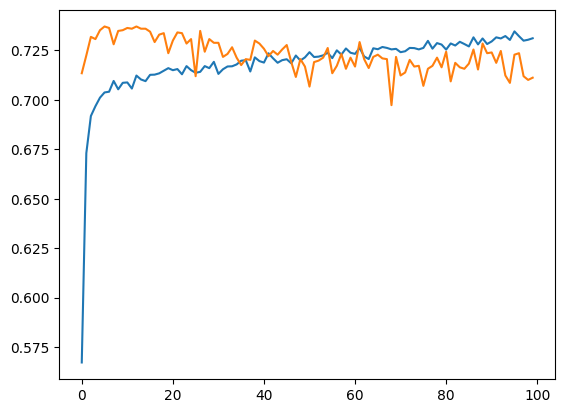

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

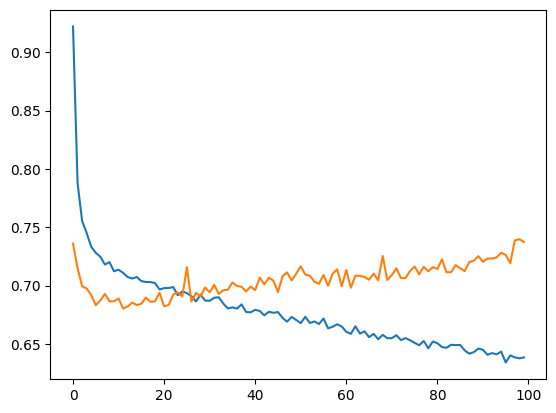

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred6 = NN_model.predict(X_test)
y_pred6 = np.argmax(y_pred6, axis=-1)

105/105 [==============================] - 0s 1ms/step


In [ ]:
# Measuring accuracy
print(classification_report(y_test, y_pred6))

# Evaluate the accuracy of the MLPClassifier on the testing data
accuracy = accuracy_score(y_test, y_pred6)
print('Accuracy:', accuracy)

# compute confusion matrix
con6 = confusion_matrix(y_test, y_pred6)
print("Confusion matrix:\n", con6)

# compute F1 score
f1 = f1_score(y_test, y_pred6,average='weighted')
print("F1 score:", f1)

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       852
           1       0.80      0.56      0.66      1338
           2       0.71      0.70      0.70      1143

    accuracy                           0.69      3333
   macro avg       0.70      0.72      0.70      3333
weighted avg       0.72      0.69      0.69      3333

Accuracy: 0.6945694569456946
Confusion matrix:
 [[766  41  45]
 [301 747 290]
 [192 149 802]]
F1 score: 0.6903975480329322


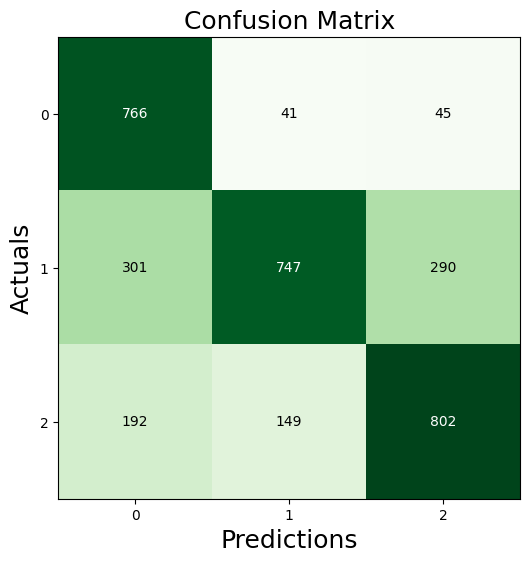

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=con6, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()